# Formal Upper Ontology Usage

This notebook is for an analysis of usage of terms from upper ontologies in OBO. Currently the FTLOs analyzed are:

- BFO
- OGMS

Contact me for the draft of the paper in progress

In [11]:
import sqlite3
import pandas as pd

In [12]:
import oaklib
from oaklib.selector import get_implementation_from_shorthand

In [13]:
import pandas as pd

## OBO Metadata

In [14]:
import yaml

In [15]:
with open("../metadata/ontologies.yml") as f:
    ontologies = yaml.safe_load(f)["ontologies"]
ontology_ids = [ont["id"] for ont in ontologies]
ontology_ids[0:20]

['ado',
 'agro',
 'aism',
 'amphx',
 'apo',
 'apollo_sv',
 'aro',
 'bco',
 'bfo',
 'bspo',
 'bto',
 'caro',
 'cdao',
 'cdno',
 'chebi',
 'cheminf',
 'chiro',
 'chmo',
 'cido',
 'cio']

In [16]:
ont2prefix = {ont["id"]: ont.get("preferredPrefix", ont["id"].upper()) for ont in ontologies}

In [4]:
# Not used??
bfo = get_implementation_from_shorthand("../db/bfo.db")
ogms = get_implementation_from_shorthand("../db/ogms.db")
def get_label(id):
    if id.startswith("BFO:"):
        return bfo.label(id)
    elif id.startswith("OGMS:"):
        return ogms.label(id)

## TLO SQL views

This notebook relies on certain views being injected into the sqlite version of each database.

These can be queried either in sqlite or via OAK; e.g:

In [24]:
!find ../db/ -name "*.db" -exec bash -c "cat ../views/bfo.sql | sqlite3 {}" \; 

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)


Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Err

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepa

Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepa

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Err

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Erro

Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)
Err

Error: near line 1: in prepare, table formal_class already exists (1)
Error: near line 16: in prepare, table subclass_of_formal_class already exists (1)
Error: near line 25: in prepare, table formal_class_subclass_count_by_prefix already exists (1)
Error: near line 36: in prepare, table formal_class_subclass_count already exists (1)
Error: near line 43: in prepare, table formal_ontology_usage_count already exists (1)
Error: near line 50: in prepare, table inter_sofc_edge already exists (1)
Error: near line 63: in prepare, table intra_inter_sofc_edge already exists (1)


In [8]:
!runoak -i ../db/envo.db query -q "SELECT * FROM formal_class_subclass_count"

In [25]:
def query(ont, sql):
    con = sqlite3.connect(f"../db/{ont}.db")
    cur = con.cursor()
    rows = [row for row in cur.execute(sql)]
    return rows

In [26]:
ignored = set()
def query_all(sql):
    rows = []
    for ont, prefix in ont2prefix.items():
        q = sql.format(prefix=prefix)
        print(ont, q)
        try:
            rows += query(ont, q)
            print(len(rows))
        except Exception as e:
            print(e)
            ignored.add(ont)
    return rows

In [27]:
qt = """
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='{prefix}'
"""

rows = query_all(qt)
rows[0:3]

ado 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='ADO'

1
agro 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='AGRO'

3
aism 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='AISM'

5
amphx 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='AMPHX'

5
apo 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='APO'

5
apollo_sv 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='APOLLO_SV'

22
aro 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='ARO'

22
bco 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='BCO'

25
bfo 
SELECT prefix, formal_class_id, subc

144
ico 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='ICO'

156
ido 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='IDO'

166
ino 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='INO'

170
labo 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='LABO'

173
lepao 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='LEPAO'

173
ma 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='MA'

173
maxo 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='MAXO'

174
mco 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='MCO'

178
mf 
SELECT prefix, formal_class_id, su

307
poro 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PORO'

307
ppo 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PPO'

308
pr 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PR'

310
proco 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PROCO'

318
psdo 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PSDO'

322
pso 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PSO'

322
pw 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='PW'

322
rbo 
SELECT prefix, formal_class_id, subclass_count FROM formal_class_subclass_count_by_prefix WHERE prefix='RBO'

326
ro 
SELECT prefix, formal_class_id, subc

[('ADO', 'OGMS:0000024', 1),
 ('AGRO', 'BFO:0000023', 9),
 ('AGRO', 'BFO:0000030', 2)]

In [28]:
print(ignored)

{'resid', 'tao', 'ypo', 'ehdaa', 't4fs', 'pd_st', 'nif_cell', 'bila', 'bootstrep', 'mirnao', 'omiabis', 'sao', 'upa', 'ogi', 'gaz', 'pao', 'dc_cl', 'sep', 'fbsp', 'mamo', 'tgma', 'plo', 'pgdso', 'gro', 'adw', 'nmr', 'emap', 'mao', 'fix', 'zea', 'nif_grossanatomy', 'ato', 'tahe', 'dinto', 'rex', 'mo', 'gsso', 'idomal', 'ehda', 'miro', 'aao', 'flu', 'rnao', 'nif_dysfunction', 'epo', 'propreo', 'sibo', 'aero', 'iev', 'ngbo', 'lipro', 'habronattus', 'vhog', 'eo', 'cmf', 'micro', 'mat', 'vsao', 'ipr', 'ev', 'tahh', 'ceph', 'obo_rel', 'mfo', 'tads', 'ehdaa2', 'bcgo', 'sopharm', 'imr', 'ero', 'loggerhead'}


In [29]:
ignored_onts = [dict(id=ont["id"], 
                     title=ont["title"], 
                     status=ont["activity_status"], 
                     is_obsolete=ont.get("is_obsolete", False)) for ont in ontologies if ont["id"] in ignored]

In [30]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(ignored_onts)
df

,id,title,status,is_obsolete
0,micro,Ontology of Prokaryotic Phenotypic and Metabol...,active,False
1,ngbo,Next Generation Biobanking Ontology,active,False
2,t4fs,terms4FAIRskills,active,False
3,gsso,"Gender, Sex, and Sexual Orientation (GSSO) ont...",active,False
4,fix,Physico-chemical methods and properties,orphaned,False
5,mamo,Mathematical modeling ontology,orphaned,False
6,rex,Physico-chemical process,orphaned,False
7,sibo,Social Insect Behavior Ontology,orphaned,False
8,ceph,Cephalopod Ontology,inactive,False
9,ehdaa2,"Human developmental anatomy, abstract",inactive,False


In [31]:
df[(df.status=="active")]

,id,title,status,is_obsolete
0,micro,Ontology of Prokaryotic Phenotypic and Metabol...,active,False
1,ngbo,Next Generation Biobanking Ontology,active,False
2,t4fs,terms4FAIRskills,active,False
3,gsso,"Gender, Sex, and Sexual Orientation (GSSO) ont...",active,False


In [32]:
items = [dict(prefix=prefix, formal_class=get_label(cls), subclass_count=num, formal_ontology=cls.split(":")[0]) for prefix, cls, num in rows]

In [33]:
pd.set_option('display.max_rows', 50)
df=pd.DataFrame(items)

In [34]:
df

,prefix,formal_class,subclass_count,formal_ontology
0,ADO,obsolete_sign,1,OGMS
1,AGRO,role,9,BFO
2,AGRO,object,2,BFO
3,AISM,independent continuant,1,BFO
4,AISM,material entity,3,BFO
...,...,...,...,...
357,WBls,occurrent,677,BFO
358,SCDO,phenotype,3,OGMS
359,SCDO,disease phenotype,1,OGMS
360,SCDO,genetic disorder,1,OGMS


In [35]:
bfo_df = df[(df.formal_ontology=="BFO")]
ogms_df = df[(df.formal_ontology=="OGMS")]
ogms_df

,prefix,formal_class,subclass_count,formal_ontology
0,ADO,obsolete_sign,1,OGMS
18,APOLLO_SV,clinical phenotype,1,OGMS
19,APOLLO_SV,disease,1,OGMS
20,APOLLO_SV,treatment,2,OGMS
21,APOLLO_SV,inpatient encounter,1,OGMS
...,...,...,...,...
340,TXPO,disease course,2,OGMS
358,SCDO,phenotype,3,OGMS
359,SCDO,disease phenotype,1,OGMS
360,SCDO,genetic disorder,1,OGMS


In [36]:
df.to_csv("../results/results.tsv", sep="\t", index=False)

In [37]:
import seaborn as sns
import matplotlib.pylab as plt

In [38]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})

## Usage of different upper ontology terms

Here we chart the usage of different terms in upper ontologies.

A usage is an ontology that includes a base axioms subclassing a base class from an upper class

### All upper ontology usage in OBO

<Axes: xlabel='upper ontology class', ylabel='number of ontologies subclassing'>

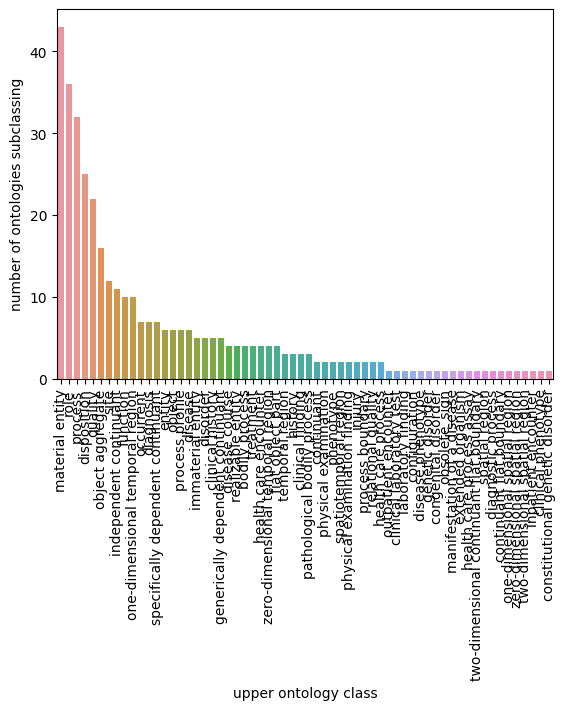

In [39]:
plot = sns.countplot(x='formal_class', data=df, order = df['formal_class'].value_counts().index)
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90)
plot.set(xlabel='upper ontology class', ylabel='number of ontologies subclassing')
plot

## BFO Usage in OBO

Usage of distinct BFO terms, most frequent to least frequent

<Axes: xlabel='upper ontology class', ylabel='number of ontologies subclassing'>

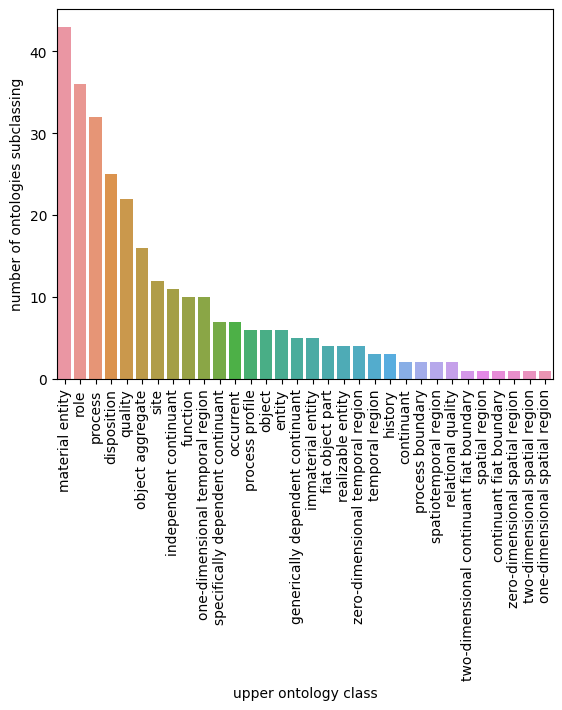

In [40]:
plot = sns.countplot(x='formal_class', data=bfo_df, order = bfo_df['formal_class'].value_counts().index)
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90)
plot.set(xlabel='upper ontology class', ylabel='number of ontologies subclassing')
plot

### BFO classes that are infrequently used

Let's explore the long tail of the plot. First, the singleton uses:

In [41]:
bfo_df.groupby("formal_class").filter(lambda x: len(x) == 1).sort_values("formal_class").style.hide(axis='index')

prefix,formal_class,subclass_count,formal_ontology
CHMO,continuant fiat boundary,1,BFO
CARO,one-dimensional spatial region,1,BFO
ENVO,spatial region,1,BFO
ENVO,two-dimensional continuant fiat boundary,2,BFO
CARO,two-dimensional spatial region,1,BFO
CARO,zero-dimensional spatial region,1,BFO


Examining one particular case:

In [42]:
!runoak -i ../db/chmo.db tree -p i --down "continuant fiat boundary"

* [] **BFO:0000140 ! continuant fiat boundary**
    * [i] CHMO:0002349 ! boundary between portions of material
        * [i] CHMO:0002350 ! liquid junction


Note that `CHMO:0002350` *liquid junction* has no other relationships to other classes. It's not really clear what benefit is derived from this.

let's explore further out in the long tail, BFO classes that are used by 5 ontologies or less:

In [43]:
bfo_df.groupby("formal_class").filter(lambda x: len(x) <= 5).sort_values("formal_class").style.hide(axis='index')

prefix,formal_class,subclass_count,formal_ontology
WBbt,continuant,2766,BFO
FYPO,continuant,2,BFO
CHMO,continuant fiat boundary,1,BFO
PR,fiat object part,1,BFO
MF,fiat object part,1,BFO
ENVO,fiat object part,2,BFO
APOLLO_SV,fiat object part,1,BFO
APOLLO_SV,generically dependent continuant,1,BFO
TXPO,generically dependent continuant,1,BFO
GENO,generically dependent continuant,5,BFO


In [44]:
byfc = bfo_df.groupby("formal_class").filter(lambda x: len(x) <= 5).sort_values("formal_class")
byfc.groupby(["formal_class"])['prefix'].apply(','.join).reset_index().style.hide(axis='index')

formal_class,prefix
continuant,"WBbt,FYPO"
continuant fiat boundary,CHMO
fiat object part,"PR,MF,ENVO,APOLLO_SV"
generically dependent continuant,"APOLLO_SV,TXPO,GENO,IAO,LABO"
history,"RBO,ECOCORE,SEPIO"
immaterial entity,"CARO,GECKO,GENEPIO,PLANA,UBERON"
one-dimensional spatial region,CARO
process boundary,"PROCO,OBIB"
realizable entity,"OBI,STATO,ONS,OPMI"
relational quality,"OMRSE,PSDO"


Note we are counting *direct* usages.

`continuant` is only directly twice once, by WBbt and FYPO. Many other ontologies *indirectly* used continuant via a more specific BFO class. WBbt is the outlier here likely due to the continuant parent class being asserted by a reasoner at the time of release.

Similarly, with `realizable entity`, many ontologies will commit to a subclass.

We can see how one of these ontologies uses it:

In [45]:
!runoak -i ../db/obi.db relationships --direction both "realizable entity"

subject	subject_label	predicate	predicate_label	object	object_label
BFO:0000017	realizable entity	rdfs:subClassOf	None	BFO:0000020	specifically dependent continuant
BFO:0000016	disposition	rdfs:subClassOf	None	BFO:0000017	realizable entity
BFO:0000023	role	rdfs:subClassOf	None	BFO:0000017	realizable entity
IAO:0000033	directive information entity	IAO:0000136	is about	BFO:0000017	realizable entity
OBI:0000260	plan	rdfs:subClassOf	None	BFO:0000017	realizable entity


In [46]:
!runoak -i ../db/obi.db tree -p i OBI:0000260

* [] BFO:0000001 ! entity
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] **OBI:0000260 ! plan**


## OGMS Usage in OBO

<Axes: xlabel='upper ontology class', ylabel='number of ontologies subclassing'>

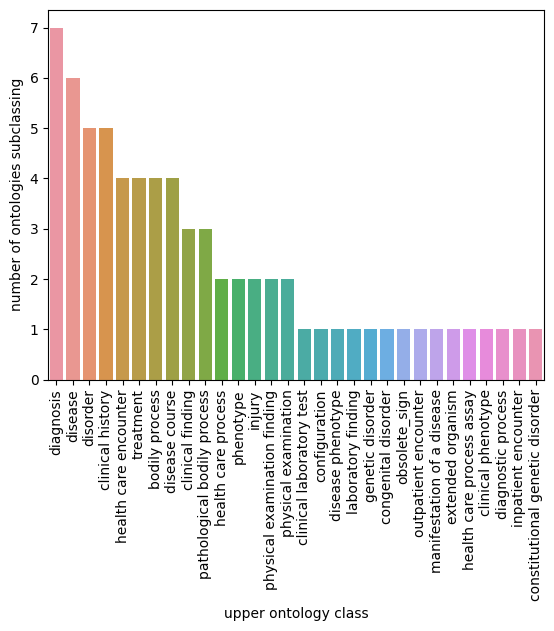

In [47]:
plot = sns.countplot(x='formal_class', data=ogms_df, order = ogms_df['formal_class'].value_counts().index)
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90)
plot.set(xlabel='upper ontology class', ylabel='number of ontologies subclassing')
plot

## Grouping by OBO ontology

### Which ontologies use most OGMS classes?

<Axes: xlabel='OBO ontology', ylabel='number of distinct OGMS classes used'>

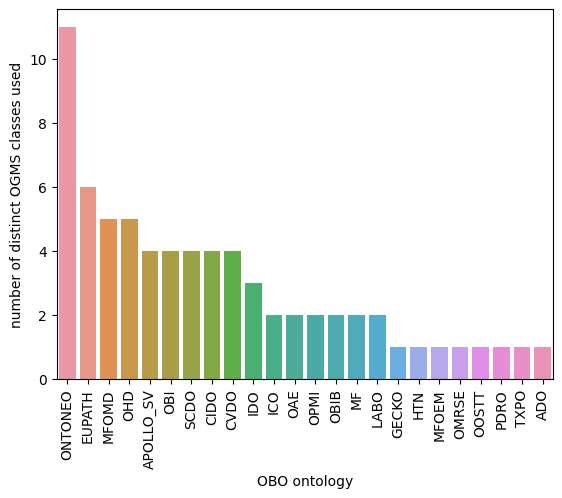

In [48]:
plot = sns.countplot(x='prefix', data=ogms_df, order = ogms_df['prefix'].value_counts().index)
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90)
plot.set(xlabel='OBO ontology', ylabel='number of distinct OGMS classes used')
plot

### Which ontologies use most BFO classes?

<Axes: xlabel='prefix', ylabel='count'>

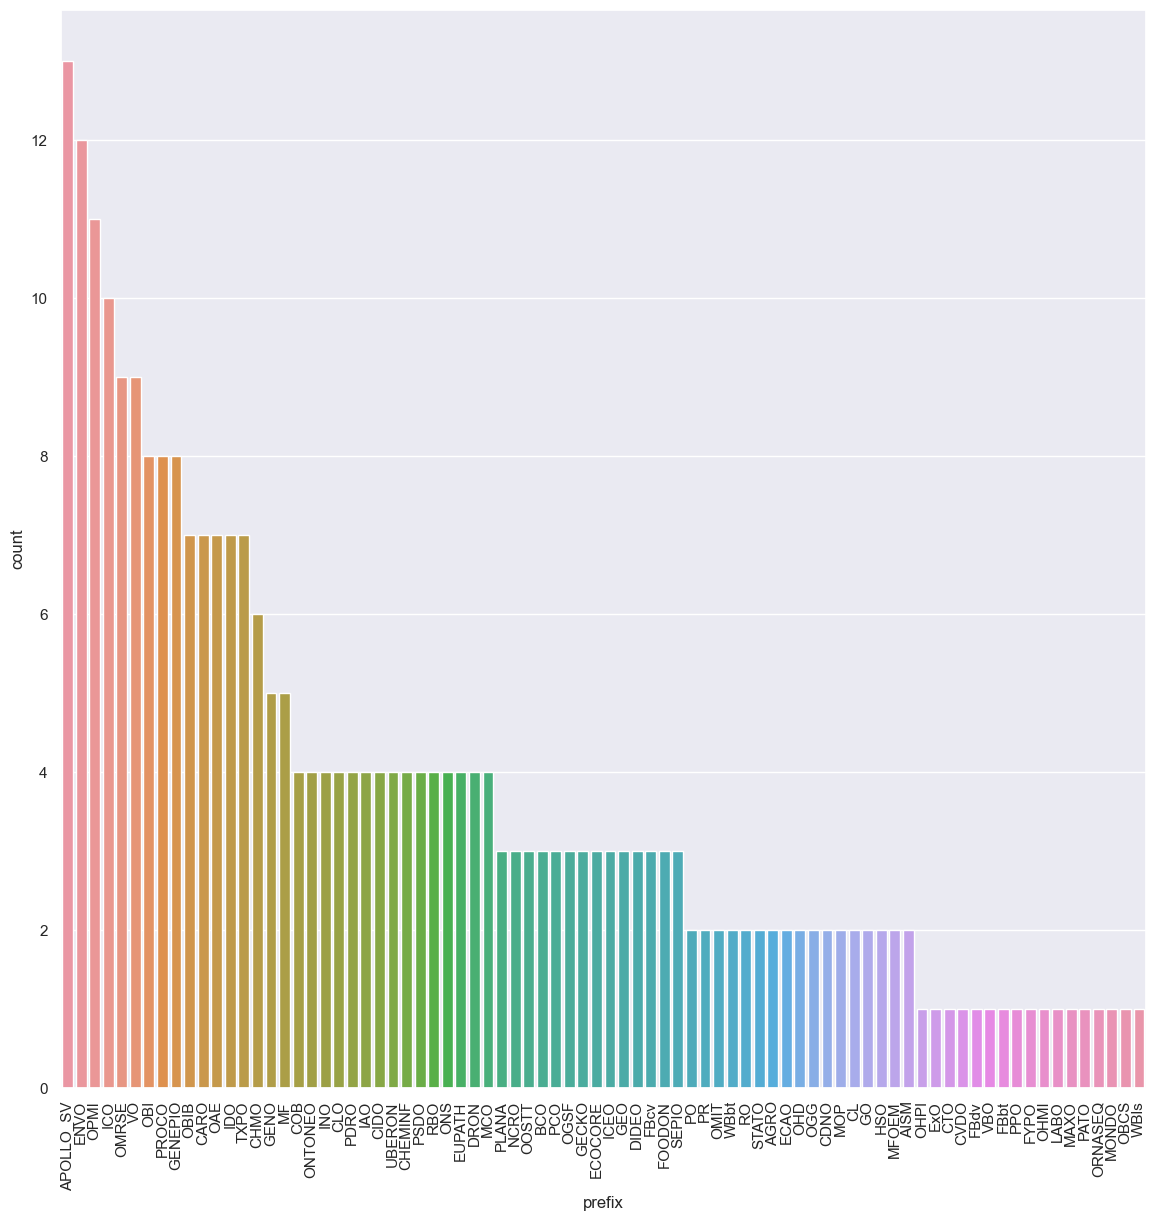

In [85]:
sns.set(rc={'figure.figsize':(14,14)})
plot = sns.countplot(x='prefix', data=bfo_df, order = bfo_df['prefix'].value_counts().index)
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90)
plot

<Axes: >

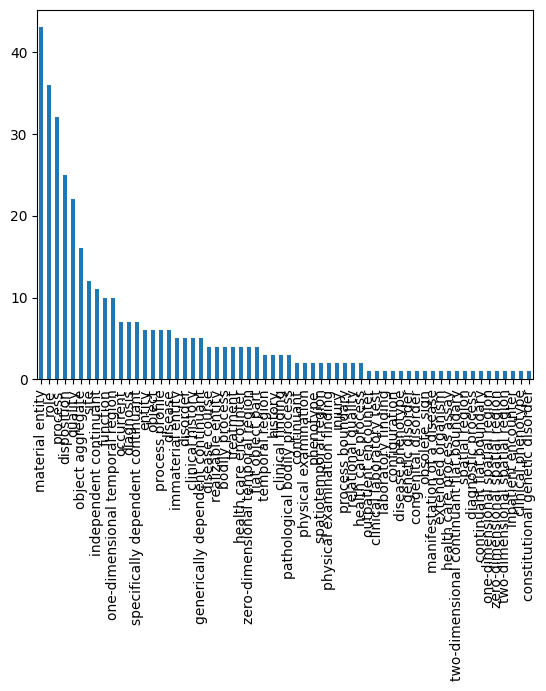

In [50]:
df['formal_class'].value_counts().plot(kind="bar")

### OBO ontologies that do not use BFO

In [51]:
ontologies_that_use_bfo = bfo_df["prefix"].tolist()

In [52]:
items = [dict(ont=ont) for ont, prefix in ont2prefix.items() if prefix not in ontologies_that_use_bfo and ont not in ignored]

In [53]:
pd.DataFrame(items)

,ont
0,ado
1,amphx
2,apo
3,aro
4,bfo
...,...
99,sbo
100,scdo
101,vario
102,aeo


## Axiom Depth Analysis


In [99]:
df = pd.read_csv("../results/ont-axiom-depths.tsv", sep="\t")
df['ont'] = df['ont'].apply(lambda x: x.upper())
filtered_df = df[(df.max_depth>1)]
filtered_df

,ont,max_depth,class,example
2,AGRO,9,http://purl.obolibrary.org/obo/AGRO_00000002,...
5,ALLOTROPE,15,http://purl.allotrope.org/ontologies/result#AF...,...
9,APOLLO_SV,15,http://purl.obolibrary.org/obo/APOLLO_SV_00000357,...
11,BAO,9,http://www.bioassayontology.org/bao#BAO_0000151,...
13,BCO,3,http://purl.obolibrary.org/obo/BCO_0000044,<owl:onProperty rdf:re...
...,...,...,...,...
240,VO,7,http://purl.obolibrary.org/obo/VO_0000001,<owl:o...
244,WBLS,5,http://purl.obolibrary.org/obo/WBls_0000803,<owl:onPropert...
245,WBPHENOTYPE,9,http://purl.obolibrary.org/obo/WBPhenotype_000...,...
249,XPO,9,http://purl.obolibrary.org/obo/XPO_0103396,...


<Axes: xlabel='ont', ylabel='max_depth'>

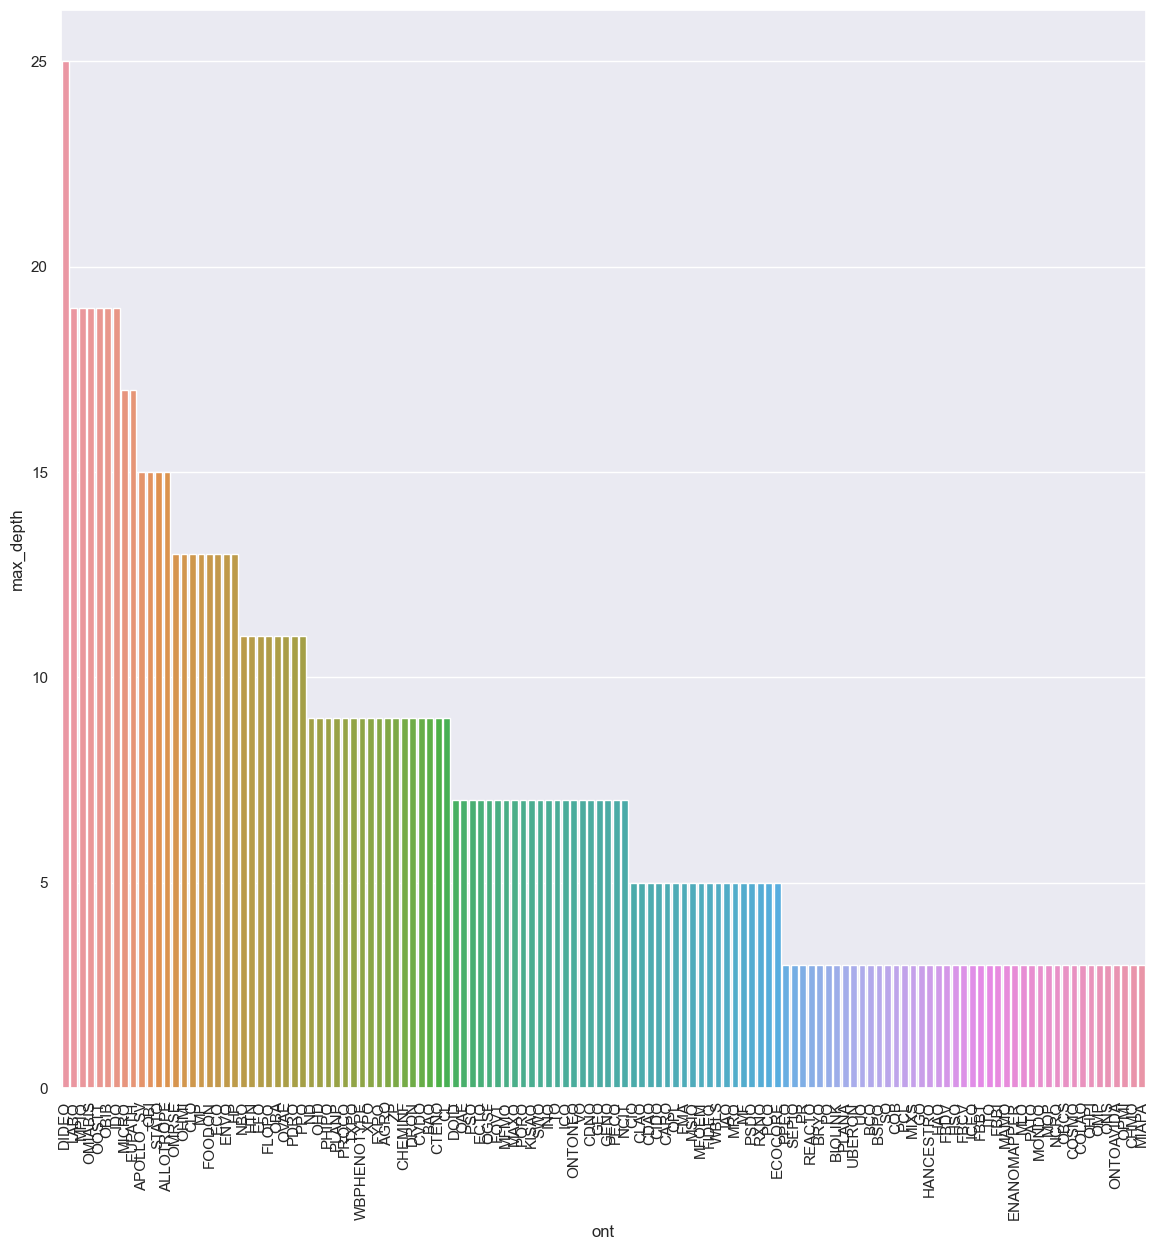

In [100]:
sns.set(rc={'figure.figsize':(14,14)})
plot = sns.barplot(x='ont', data=filtered_df,y='max_depth', order=filtered_df.sort_values('max_depth',ascending = False).ont)
loc, labels = plt.xticks()
plot.set_xticklabels(labels, rotation=90)
plot

In [111]:
sf = bfo_df['prefix'].value_counts()
bfo_counts_df = pd.DataFrame({'prefix':sf.index, 'bfo_count':sf.values})

In [112]:
bfo_axiom_depth_df = pd.merge(df, bfo_counts_df, left_on='ont', right_on='prefix')

In [113]:
bfo_axiom_depth_df

,ont,max_depth,class,example,prefix,bfo_count
0,AGRO,9,http://purl.obolibrary.org/obo/AGRO_00000002,...,AGRO,2
1,AISM,1,http://purl.obolibrary.org/obo/AISM_0004097,"<owl:onProperty rdf:resource=""...",AISM,2
2,APOLLO_SV,15,http://purl.obolibrary.org/obo/APOLLO_SV_00000357,...,APOLLO_SV,13
3,BCO,3,http://purl.obolibrary.org/obo/BCO_0000044,<owl:onProperty rdf:re...,BCO,3
4,CARO,5,http://purl.obolibrary.org/obo/CARO_0000007,<owl:onPropert...,CARO,7
...,...,...,...,...,...,...
68,STATO,15,http://purl.obolibrary.org/obo/STATO_0000073,...,STATO,2
69,TXPO,9,http://purl.obolibrary.org/obo/TXPO_0000139,...,TXPO,7
70,UBERON,3,http://purl.obolibrary.org/obo/UBERON_0000002,<owl:onProperty rdf:re...,UBERON,4
71,VBO,0,NaN,NaN,VBO,1


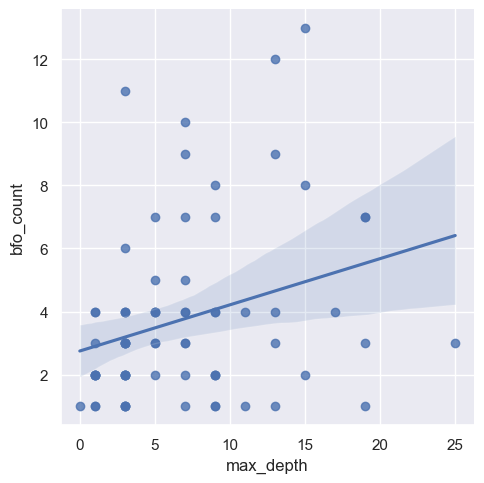

In [115]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x="max_depth", y="bfo_count", data=bfo_axiom_depth_df)
plt.show()

In [116]:
bfo_axiom_depth_df["bfo_count"].corr(bfo_axiom_depth_df["max_depth"])

0.2913846207063947

In [117]:
import scipy

In [120]:
scipy.stats.kendalltau(bfo_axiom_depth_df["bfo_count"], bfo_axiom_depth_df["max_depth"])

KendalltauResult(correlation=0.24353879303100615, pvalue=0.006906090865113798)

### Example of highly nested axiom

OMIABIS definition of Biobank

```owl
'object aggregate'
 and ('has part' some 
    ('object aggregate'
     and ('has part' only 
        (specimen
         and ('participates in' some storage)))))
 and ('has part' some 
    ('material information bearer'
     and ('participates in' some 
        ('digital curation'
         and (has_specified_output some 
            ('data set'
             and ('is about' some 
                ('object aggregate'
                 and ('has part' only specimen)))))))))
 and ('is owned by' some 'biobank organization')
```

## Usage Trees

Next we draw some usage trees for various ontologies

In [54]:
from IPython.display import display, Markdown, Latex

def tree(ont):
    !runoak -i ../db/{ont}.db tree -p i [ .query "SELECT subject FROM subclass_of_formal_class" .and i^{ont}: ] > tree-{ont}.md
    with open(f"tree-{ont}.md") as f:
        md = f.read()
        display(Markdown(md))

In [55]:
tree("envo")

* [] BFO:0000001 ! entity
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000015 ! process
            * [i] **ENVO:02500000 ! environmental system process**
        * [i] BFO:0000008 ! temporal region
            * [i] BFO:0000038 ! one-dimensional temporal region
                * [i] **ENVO:01001641 ! glaciation**
                * [i] **ENVO:01001642 ! interglacial**
                * [i] **ENVO:01001643 ! ice age**
                * [i] **ENVO:01003005 ! day**
                * [i] **ENVO:03000096 ! season**
                * [i] **ENVO:09200037 ! hours of sunshine**
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000040 ! material entity
                * [i] **ENVO:00003074 ! manufactured product**
                * [i] **ENVO:01000281 ! layer**
                * [i] BFO:0000024 ! fiat object part
                    * [i] **ENVO:00010483 ! environmental material**
                    * [i] **ENVO:01000813 ! astronomical body part**
                * [i] BFO:0000030 ! object
                    * [i] **ENVO:00010358 ! fomite**
                    * [i] **ENVO:01000498 ! pole**
                    * [i] **ENVO:01000804 ! astronomical object**
                    * [i] **ENVO:01001008 ! meteor**
                    * [i] **ENVO:01001686 ! mass of environmental material**
                * [i] **ENVO:01001813 ! construction**
                * [i] **ENVO:03500005 ! anthropogenic litter**
                * [i] BFO:0000027 ! object aggregate
                    * [i] **ENVO:01001564 ! rain**
                    * [i] **ENVO:03400009 ! falling sleet**
                    * [i] **ENVO:03400013 ! falling snow**
                    * [i] **ENVO:03501314 ! food production environmental monitoring zone 1**
                    * [i] **ENVO:03501315 ! food production environmental monitoring zone 2**
                    * [i] **ENVO:03501316 ! food production environmental monitoring zone 3**
                    * [i] **ENVO:03501317 ! food production environmental monitoring zone 4**
            * [i] BFO:0000141 ! immaterial entity
                * [i] BFO:0000029 ! site
                    * [i] **ENVO:00000004 ! administrative region**
                    * [i] **ENVO:00000102 ! cave entrance**
                    * [i] **ENVO:00000564 ! archeological site**
                    * [i] **ENVO:01000408 ! environmental zone**
                    * [i] **ENVO:01001173 ! sacred site**
                * [i] BFO:0000140 ! continuant fiat boundary
                    * [i] BFO:0000146 ! two-dimensional continuant fiat boundary
                        * [i] **ENVO:00000486 ! shoreline**
                        * [i] **ENVO:01001544 ! two-dimensional fiat ice surface**
                * [i] BFO:0000006 ! spatial region
                    * [i] **ENVO:03501369 ! seam surface**
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000016 ! disposition
                    * [i] **ENVO:01000452 ! environmental disposition**
                    * [i] **ENVO:01003001 ! water-holding capacity**
                    * [i] BFO:0000034 ! function
                        * [i] **ENVO:00003076 ! glue**
                        * [i] **ENVO:03510066 ! chemical colorant**
                    * [i] **ENVO:06105002 ! thermoplasticity**
                    * [i] **ENVO:06105004 ! thermosetting disposition**
                    * [i] **ENVO:2000015 ! energy**


In [56]:
tree("ontoneo")

* [] BFO:0000001 ! entity
    * [i] BFO:0000003 ! ocorrente
        * [i] BFO:0000008 ! temporal region
            * [i] BFO:0000148 ! zero-dimensional temporal region
                * [i] **ONTONEO:00000055 ! date**
        * [i] BFO:0000015 ! processo
            * [i] OGMS:0000096 ! health care process
                * [i] OGMS:0000097 ! health care encounter
                    * [i] OGMS:0000057 ! physical examination
                        * [i] **ONTONEO:00000000 ! female physical examination**
                        * [i] **ONTONEO:00000026 ! male physical examination**
                    * [i] **ONTONEO:00000067 ! prenatal encounter**
                * [i] **ONTONEO:00000078 ! follow-up**
            * [i] OBI:0000011 ! processo planejado
                * [i] OAE:0000002 ! medical intervention
                    * [i] OGMS:0000056 ! teste de laboratório
                        * [i] **ONTONEO:00000111 ! urine test**
                        * [i] **ONTONEO:00000113 ! stool test**
    * [i] BFO:0000002 ! continuante
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000016 ! disposição
                    * [i] BFO:0000034 ! função
                        * [i] **ONTONEO:00000102 ! primary care function**
            * [i] BFO:0000019 ! quality
                * [i] **ONTONEO:00000126 ! grupo sanguíneo**
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000027 ! data item
                    * [i] OGMS:0000073 ! diagnosis
                        * [i] **ONTONEO:00000094 ! prenatal diagnosis**
                    * [i] OGMS:0000014 ! descobertas clínicas
                        * [i] OGMS:0000083 ! physical examination finding
                            * [i] **ONTONEO:00000015 ! achados do exame físico abdominal feminino**
                            * [i] **ONTONEO:00000016 ! breast examination finding**
                            * [i] **ONTONEO:00000018 ! pelvic examination finding**
                            * [i] **ONTONEO:00000019 ! vaginal examination finding**
                        * [i] **ONTONEO:00000057 ! vital sign finding**
                        * [i] OGMS:0000015 ! história clínica
                            * [i] **ONTONEO:00000224 ! história clínica familiar**
                            * [i] **ONTONEO:00000225 ! obstetric history**
                            * [i] **ONTONEO:00000226 ! história ginecológica**
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000040 ! material entity
                * [i] BFO:0000027 ! objeto agregado
                    * [i] **ONTONEO:00000068 ! canal de parto**
                * [i] OGMS:0000045 ! disorder
                    * [i] **ONTONEO:00000156 ! macrossomia**
                * [i] OGMS:0000089 ! congenital malformation
                    * [i] **ONTONEO:00000210 ! mullerian duct anomalies**
                * [i] OGMS:0000102 ! lesão
                    * [i] **ONTONEO:00000247 ! uterine injury**
                    * [i] **ONTONEO:00000248 ! vaginal injury**
                    * [i] **ONTONEO:00000249 ! breast injury**


In [57]:
tree("eupath")

* [] BFO:0000001 ! entity
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000015 ! process
            * [i] OBI:0000011 ! planned process
                * [i] OGMS:0000096 ! health care process
                    * [i] OGMS:0000097 ! health care encounter
                        * [i] **EUPATH:0000581 ! baby delivery**
                * [i] OGMS:0000090 ! treatment
                    * [i] **EUPATH:0000740 ! malaria treatment**
                    * [i] **EUPATH:0010024 ! rehydration treatment**
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000023 ! role
                    * [i] **EUPATH:0000105 ! building material role**
            * [i] BFO:0000019 ! quality
                * [i] **EUPATH:0000757 ! parasite phenotype**
                * [i] **EUPATH:0010217 ! stool consistency**
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000027 ! data item
                    * [i] OGMS:0000123 ! clinical data item
                        * [i] OGMS:0000014 ! clinical finding
                            * [i] **EUPATH:0000793 ! finding of death from COVID-19**
                            * [i] OGMS:0000015 ! clinical history
                                * [i] **EUPATH:0000392 ! information on contact with malaria**
                                * [i] **EUPATH:0010013 ! previous diarrheal treatment datum**
                                * [i] **EUPATH:0021032 ! Plasmodium falciparum diagnosis within past year**
                                * [i] **EUPATH:0021033 ! Plasmodium vivax diagnosis within past year**
                                * [i] **EUPATH:0021034 ! Plasmodium malariae diagnosis within past year**
                            * [i] OGMS:0000083 ! physical examination finding
                                * [i] **EUPATH:0023057 ! indicator of whether participant died in hospital**
                        * [i] OGMS:0000073 ! diagnosis
                            * [i] **EUPATH:0000036 ! diagnosis of parasitic infectious disease**
                            * [i] **EUPATH:0000317 ! diagnosis of disease other than malaria**
                            * [i] **EUPATH:0000321 ! diagnosis at patient discharge**
                            * [i] **EUPATH:0000638 ! diagnosis at hospital admission**
                            * [i] **EUPATH:0010393 ! diagnosis previous to two month follow-up**
                            * [i] **EUPATH:0025044 ! diagnosis of diarrhea**
                            * [i] **EUPATH:0025045 ! diagnosis of pneumonia**
                            * [i] **EUPATH:0025046 ! diagnosis of upper respiratory tract disease**
                            * [i] **EUPATH:0025162 ! diagnosis of malaria**
                            * [i] **EUPATH:0033426 ! diagnosis of global developmental delay or cerebral palsy at hospital admission**
                            * [i] **EUPATH:0033427 ! diagnosis of meningitis at hospital admission**
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000141 ! immaterial entity
                * [i] BFO:0000029 ! site
                    * [i] **EUPATH:0000530 ! location where GPS coordinates were taken**
                    * [i] **EUPATH:0000542 ! location of specimen collection**
                    * [i] **EUPATH:0010067 ! location of death**
                    * [i] **EUPATH:0010112 ! location of hand washing**
            * [i] BFO:0000040 ! material entity
                * [i] **EUPATH:0000001 ! building material**
                * [i] **EUPATH:0000023 ! cooking fuel material**
                * [i] **EUPATH:0000439 ! personal mosquito repellent**
                * [i] **EUPATH:0043056 ! arthropod attractor**


In [58]:
tree("opmi")

* [] BFO:0000001 ! entity
    * [i] **OPMI:0000414 ! obsolete class**
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000019 ! quality
                * [i] **OPMI:0000344 ! quality of life**
            * [i] BFO:0000017 ! realizable entity
                * [i] **OPMI:0000282 ! medical condition**
                * [i] **OPMI:0000326 ! status**
                * [i] BFO:0000023 ! role
                    * [i] **OPMI:0000391 ! contact person role**
                    * [i] **OPMI:0000413 ! identifier role**
                    * [i] **OPMI:0000441 ! biomarker role**
                * [i] BFO:0000016 ! disposition
                    * [i] **OPMI:0000462 ! susceptibility to biological regulation**
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000040 ! material entity
                * [i] **OPMI:0000406 ! investigation agent**
                * [i] **OPMI:0000420 ! self-replicating organic structure**
                * [i] **OPMI:0000445 ! biomarker**
            * [i] BFO:0000141 ! immaterial entity
                * [i] BFO:0000029 ! site
                    * [i] **OPMI:0000479 ! care site**
                    * [i] **OPMI:0000500 ! home**
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000027 ! data item
                    * [i] OGMS:0000123 ! clinical data item
                        * [i] OGMS:0000014 ! clinical finding
                            * [i] OGMS:0000018 ! laboratory finding
                                * [i] **OPMI:0000318 ! pregnancy test positive**
                                * [i] **OPMI:0000319 ! hemoglobin test finding**
                        * [i] OGMS:0000073 ! diagnosis
                            * [i] **OPMI:0000431 ! positive diagnosis**
                            * [i] **OPMI:0000432 ! negative diagnosis**
                            * [i] **OPMI:0000433 ! presumptive positive diagnosis**
                            * [i] **OPMI:0000537 ! principal diagnosis**
                            * [i] **OPMI:0000602 ! preliminary diagnosis**
                            * [i] **OPMI:0000605 ! primary diagnosis**
                            * [i] **OPMI:0000609 ! secondary diagnosis**
                            * [i] **OPMI:0000613 ! admission diagnosis**
                            * [i] **OPMI:0000614 ! confirmed diagnosis**
                            * [i] **OPMI:0000615 ! death diagnosis**
                            * [i] **OPMI:0000616 ! discharge diagnosis**
                            * [i] **OPMI:0000617 ! postoperative diagnosis**
                            * [i] **OPMI:0000619 ! preoperative diagnosis**
                            * [i] **OPMI:0000620 ! referral diagnosis**
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000015 ! process
            * [i] **OPMI:0000047 ! sanitation**
            * [i] **OPMI:0000229 ! health care**
            * [i] **OPMI:0000425 ! self-replication**
            * [i] **OPMI:0000588 ! medical occurrence**
        * [i] BFO:0000008 ! temporal region
            * [i] BFO:0000038 ! one-dimensional temporal region
                * [i] **OPMI:0000070 ! month of year**
                * [i] **OPMI:0000083 ! day of week**
                * [i] **OPMI:0000353 ! year**
                * [i] **OPMI:0000478 ! birth-related time**
                * [i] **OPMI:0000489 ! visit duration**
                * [i] **OPMI:0000575 ! observation period**
            * [i] **OPMI:0000576 ! observation temporal region**
                * [i] **OPMI:0000575 ! observation period**
                * [i] **OPMI:0000577 ! observation period start date**
                * [i] **OPMI:0000578 ! observation period end date**
            * [i] **OPMI:0000584 ! payer plan temporal region**
            * [i] BFO:0000148 ! zero-dimensional temporal region
                * [i] **OPMI:0000285 ! visit temporal region**
                * [i] **OPMI:0000295 ! study start date**
                * [i] **OPMI:0000297 ! study completion date**
                * [i] **OPMI:0000302 ! date of registration**
                * [i] **OPMI:0000313 ! today's date**
                * [i] **OPMI:0000322 ! date of test**
                * [i] **OPMI:0000325 ! sign date**
                * [i] **OPMI:0000507 ! procedure temporal region**
                * [i] **OPMI:0000528 ! condition temporal region**
                * [i] **OPMI:0000556 ! device exposure temporal region**
                * [i] **OPMI:0000564 ! drug exposure temporal region**
                * [i] **OPMI:0000577 ! observation period start date**
                * [i] **OPMI:0000578 ! observation period end date**
                * [i] **OPMI:0000579 ! measurement time**
                * [i] **OPMI:0004486 ! time of biopsy**


In [59]:
tree("obi")

* [] BFO:0000001 ! entity
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000015 ! process
            * [i] **OBI:0000011 ! planned process**
            * [i] **OBI:0000076 ! unplanned occurrence effecting an investigation**
            * [i] **OBI:0000339 ! planning**
            * [i] GO:0008150 ! biological_process
                * [i] OGMS:0000063 ! disease course
                    * [i] **OBI:1110008 ! occurrence of infectious disease**
                    * [i] **OBI:1110012 ! occurrence of allergy**
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000027 ! data item
                    * [i] OGMS:0000073 ! diagnosis
                        * [i] **OBI:0002371 ! diagnosis of cancer**
                        * [i] **OBI:0002385 ! diagnosis of infectious disease**
                * [i] OGMS:0000015 ! clinical history
                    * [i] **OBI:0002368 ! clinical history of cancer**
                    * [i] **OBI:0002369 ! clinical history devoid of cancer**
                    * [i] **OBI:0002370 ! unknown clinical history of cancer**
                    * [i] **OBI:0002372 ! family clinical history of cancer**
                    * [i] **OBI:0002389 ! clinical history of repeated HIV assays**
                    * [i] **OBI:0002390 ! exposure to second hand smoke**
                    * [i] **OBI:0002393 ! pregnancy history**
                    * [i] **OBI:0002397 ! gynecologic surgery history**
                    * [i] **OBI:0002405 ! hormonal replacement therapy history**
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000019 ! quality
                * [i] **OBI:0000654 ! device setting**
            * [i] BFO:0000017 ! realizable entity
                * [i] **OBI:0000260 ! plan**
                * [i] BFO:0000016 ! disposition
                    * [i] **OBI:0001486 ! disposition to be bound by an MHC protein complex**
                    * [i] **OBI:0001511 ! disposition to be a product of antigen processing and presentation**
                    * [i] **OBI:1110010 ! disposition to cause an allergic reaction**
                    * [i] **OBI:1110045 ! disposition to be bound by an adaptive immune receptor**
                    * [i] OGMS:0000031 ! disease
                        * [i] **OBI:1110040 ! infectious disease**
                        * [i] **OBI:1110049 ! allergy**
                        * [i] **OBI:1110053 ! cancer**
                        * [i] **OBI:1110054 ! autoimmune disease**
                    * [i] BFO:0000034 ! function
                        * [i] **OBI:0000368 ! record function**
                        * [i] **OBI:0000369 ! magnify function**
                        * [i] **OBI:0000370 ! contain function**
                        * [i] **OBI:0000371 ! heat function**
                        * [i] **OBI:0000372 ! material separation function**
                        * [i] **OBI:0000374 ! excitation function**
                        * [i] **OBI:0000375 ! freeze function**
                        * [i] **OBI:0000376 ! synthesizing function**
                        * [i] **OBI:0000377 ! perturb function**
                        * [i] **OBI:0000379 ! mechanical function**
                        * [i] **OBI:0000383 ! transfer function**
                        * [i] **OBI:0000385 ! ionization function**
                        * [i] **OBI:0000387 ! cool function**
                        * [i] **OBI:0000388 ! connection function**
                        * [i] **OBI:0000391 ! energy supply function**
                        * [i] **OBI:0000392 ! information processor function**
                        * [i] **OBI:0000399 ! solid support function**
                        * [i] **OBI:0000401 ! environment control function**
                        * [i] **OBI:0000453 ! measure function**
                        * [i] **OBI:0000455 ! consume data function**
                        * [i] **OBI:0000928 ! material combination function**
                        * [i] **OBI:0000946 ! sterilization function**
                        * [i] **OBI:0000960 ! reagent application function**
                        * [i] **OBI:0001036 ! specimen fixation function**
                        * [i] **OBI:0001040 ! current amplification function**
                        * [i] **OBI:0001041 ! stabilization function**
                        * [i] **OBI:0005246 ! injection function**
                        * [i] **OBI:1110016 ! adaptive immune effector function**
                        * [i] **OBI:1110085 ! antigen presentation function**
                    * [i] **OBI:1110093 ! disposition to infect an organism**
                * [i] BFO:0000023 ! role
                    * [i] **OBI:0000017 ! regulatory role**
                    * [i] **OBI:0000025 ! reference substance role**
                    * [i] **OBI:0000029 ! centrifuge pellet role**
                    * [i] **OBI:0000034 ! supernatant role**
                    * [i] **OBI:0000040 ! drug role**
                    * [i] **OBI:0000067 ! evaluant role**
                    * [i] **OBI:0000086 ! reagent role**
                    * [i] **OBI:0000091 ! detector reagent role**
                    * [i] **OBI:0000093 ! patient role**
                    * [i] **OBI:0000097 ! participant under investigation role**
                    * [i] **OBI:0000112 ! specimen role**
                    * [i] **OBI:0000174 ! study group role**
                    * [i] **OBI:0000202 ! investigation agent role**
                    * [i] **OBI:0000204 ! nutrient role**
                    * [i] **OBI:0000237 ! antigen role**
                    * [i] **OBI:0000319 ! material to be added role**
                    * [i] **OBI:0000416 ! cloning insert role**
                    * [i] **OBI:0000444 ! target of material addition role**
                    * [i] **OBI:0000571 ! manufacturer role**
                    * [i] **OBI:0000718 ! pathogen role**
                    * [i] **OBI:0000725 ! host role**
                    * [i] **OBI:0000847 ! test substance role**
                    * [i] **OBI:0000857 ! complementary nucleotide probe role**
                    * [i] **OBI:0000941 ! service consumer role**
                    * [i] **OBI:0000947 ! service provider role**
                    * [i] **OBI:0000949 ! accessed material role**
                    * [i] **OBI:0001687 ! contact representative role**
                    * [i] **OBI:0002444 ! measurand role**
                    * [i] **OBI:0002996 ! blood meal source role**
                    * [i] **OBI:0002997 ! arthropod attractor role**
                    * [i] **OBI:0302731 ! buffer role**
                    * [i] **OBI:0302732 ! solvent role**
                    * [i] **OBI:0302733 ! solute role**
                    * [i] **OBI:0302846 ! randomized group participant role**
                    * [i] **OBI:1110082 ! immunogen role**
                    * [i] **OBI:1110083 ! host of immune response role**
                    * [i] **OBI:1110086 ! restricting MHC role**
                    * [i] **OBI:1110087 ! donor**
                    * [i] **OBI:1110091 ! immune epitope carrier role**
                    * [i] **OBI:1110092 ! adjuvant role**
                    * [i] **OBI:1110120 ! assay antigen role**
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000141 ! immaterial entity
                * [i] BFO:0000029 ! site
                    * [i] **OBI:0400059 ! interrogation_point**
                    * [i] **OBI:0400061 ! jet_in_air_flow_chamber**
            * [i] BFO:0000040 ! material entity
                * [i] **OBI:0000047 ! processed material**
                * [i] **OBI:0000181 ! population**
                * [i] **OBI:0000245 ! organization**
                * [i] **OBI:0000427 ! enzyme**
                * [i] **OBI:0000576 ! scattered molecular aggregate**
                * [i] **OBI:0000798 ! capsule shell**
                * [i] **OBI:0000814 ! guar gum**
                * [i] **OBI:0000835 ! manufacturer**
                * [i] **OBI:0000997 ! growth environment**
                * [i] **OBI:0001947 ! sequence annotation provider**
                * [i] **OBI:0002076 ! collection of specimens**
                * [i] **OBI:0002989 ! material supplier**
                * [i] **OBI:0100026 ! organism**
                * [i] **OBI:0100051 ! specimen**
                * [i] **OBI:0100086 ! glucose in solution**
                * [i] **OBI:0302729 ! chemical solution**
                * [i] **OBI:1110001 ! epitope**
                * [i] **OBI:1110023 ! immunogen**
                * [i] **OBI:1110034 ! antigen**
                * [i] **OBI:1110108 ! material to be added**
                * [i] **OBI:1110109 ! target of material addition**
                * [i] **OBI:1110201 ! allergen**


In [122]:
tree("oostt")

* [] BFO:0000001 ! entity
    * [i] **OOSTT:00000016 ! enabling legislation**
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000015 ! process
            * [i] OGMS:0000096 ! health care process
                * [i] **OOSTT:00000071 ! trauma care process**
                * [i] **OOSTT:00000137 ! emergency health care process**
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000016 ! disposition
                    * [i] **OOSTT:00000118 ! patient safety**
                * [i] BFO:0000023 ! role
                    * [i] **OOSTT:00000001 ! trauma team lead role**
                    * [i] **OOSTT:00000004 ! specialty liaison role**
                    * [i] **OOSTT:00000008 ! trauma lead agency role**
                    * [i] **OOSTT:00000018 ! trauma program manager role**
                    * [i] **OOSTT:00000043 ! head of emergency medicine role**
                    * [i] **OOSTT:00000046 ! reporter role**
                    * [i] **OOSTT:00000047 ! reportee role**
                    * [i] **OOSTT:00000062 ! hospital governing body role**
                    * [i] **OOSTT:00000063 ! chief executive officer role**
                    * [i] **OOSTT:00000064 ! chief medical officer role**
                    * [i] **OOSTT:00000065 ! head of clinical services role**
                    * [i] **OOSTT:00000097 ! performance evaluator role**
                    * [i] **OOSTT:00000098 ! performance evaluatee role**
                    * [i] **OOSTT:00000108 ! emergency department representative role**
                    * [i] **OOSTT:00000116 ! registrar role**
                    * [i] **OOSTT:00000117 ! committee member role**
                    * [i] **OOSTT:00000147 ! representative from emergency department to pre-hospital provider QI program**
                    * [i] **OOSTT:00000151 ! emergency medical services liaison to trauma program**
                    * [i] **OOSTT:00000197 ! general surgery privileges role**
                    * [i] **OOSTT:00000223 ! general orthopedic surgery privileges role**
                    * [i] **OOSTT:00000282 ! trauma system manager role**
                    * [i] **OOSTT:00000325 ! trauma program leadership role**


In [60]:
tree("proco")

* [] BFO:0000001 ! entity
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000027 ! data item
                    * [i] PROCO:0000295 ! process chemistry datum
                        * [i] **PROCO:0000059 ! fate of impurity**
                        * [i] PROCO:0000070 ! purge factor
                            * [i] **PROCO:0000107 ! assessed reactivity purge factor**
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000040 ! material entity
                * [i] **PROCO:0000068 ! slurry**
                * [i] BFO:0000027 ! object aggregate
                    * [i] **PROCO:0000142 ! molecular complex**
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000016 ! disposition
                    * [i] **PROCO:0000059 ! fate of impurity**
            * [i] BFO:0000019 ! quality
                * [i] **PROCO:0000013 ! critical quality attribute**
                * [i] **PROCO:0000109 ! unit cell quality**
                * [i] **PROCO:0000187 ! bulk substance quality**
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000035 ! process boundary
            * [i] **PROCO:0000010 ! route selection milestone**
            * [i] **PROCO:0000058 ! product filing milestone**
            * [i] **PROCO:0000103 ! product approval milestone**
        * [i] BFO:0000008 ! temporal region
            * [i] **PROCO:0000012 ! synthesis reaction time**
            * [i] **PROCO:0000106 ! induction period**
        * [i] BFO:0000015 ! process
            * [i] **PROCO:0000277 ! explosion**
            * [i] BFO:0000144 ! process profile
                * [i] **PROCO:0000011 ! reaction process profile**
                * [i] **PROCO:0000047 ! quality process profile**
                * [i] **PROCO:0000107 ! assessed reactivity purge factor**
                * [i] **PROCO:0000299 ! critical process parameter**


note **fate of impurity** in two places

In [121]:
tree("dideo")

* [] BFO:0000001 ! entity
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000004 ! independent continuant
            * [i] BFO:0000040 ! material entity
                * [i] **DIDEO:00000019 ! material entity participant in drug-drug interaction**
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000016 ! disposition
                    * [i] **DIDEO:00000010 ! bioavailability**
                    * [i] **DIDEO:00000016 ! narrow therapeutic index**
                    * [i] **DIDEO:00000031 ! first pass effect disposition**
                    * [i] **DIDEO:00000034 ! absorbability**
                * [i] BFO:0000023 ! role
                    * [i] **DIDEO:00000012 ! object drug role**
                    * [i] **DIDEO:00000013 ! precipitant drug role**
                    * [i] **DIDEO:00000039 ! primary total clearance enzyme role**
                    * [i] **DIDEO:00000040 ! primary metabolic clearance enzyme role**
                    * [i] **DIDEO:00000123 ! probe subtrate role**


In [61]:
tree("apollo_sv")

* [] BFO:0000001 ! entity
    * [i] BFO:0000003 ! occurrent
        * [i] BFO:0000008 ! temporal region
            * [i] BFO:0000038 ! one-dimensional temporal region
                * [i] **APOLLO_SV:00000400 ! epidemic interval**
                * [i] **APOLLO_SV:00000435 ! closure period**
        * [i] BFO:0000015 ! process
            * [i] **APOLLO_SV:00000118 ! latent period**
            * [i] **APOLLO_SV:00000140 ! infectious period**
            * [i] **APOLLO_SV:00000204 ! disease outcome**
            * [i] BFO:0000144 ! process profile
                * [i] **APOLLO_SV:00000226 ! infectiousness profile**
            * [i] **APOLLO_SV:00000306 ! infection in ecosystem**
            * [i] **APOLLO_SV:00000317 ! incubation period**
            * [i] OBI:0000011 ! planned process
                * [i] OGMS:0000090 ! treatment
                    * [i] **APOLLO_SV:00000142 ! vaccination**
                    * [i] **APOLLO_SV:00000318 ! drug treatment**
            * [i] **APOLLO_SV:00000371 ! bodily harm**
            * [i] **APOLLO_SV:00000372 ! bodily benefit**
            * [i] **APOLLO_SV:00000455 ! prodromal period**
            * [i] **APOLLO_SV:00000456 ! fulminant period**
            * [i] **APOLLO_SV:00000578 ! aggregate of disease courses**
            * [i] OGMS:0000096 ! health care process
                * [i] OGMS:0000097 ! health care encounter
                    * [i] OGMS:0000100 ! inpatient encounter
                        * [i] **APOLLO_SV:00000587 ! intensive care unit encounter**
    * [i] **APOLLO_SV:00001008 ! TODO**
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] **APOLLO_SV:00000000 ! purely intentional entity**
        * [i] BFO:0000004 ! independent continuant
            * [i] **APOLLO_SV:00000166 ! contaminated thing**
            * [i] BFO:0000040 ! material entity
                * [i] BFO:0000027 ! object_aggregate
                    * [i] **APOLLO_SV:00000094 ! community**
                * [i] **APOLLO_SV:00000097 ! ecosystem**
                * [i] **APOLLO_SV:00000100 ! abiotic ecosystem**
                * [i] **APOLLO_SV:00000104 ! biotic ecosystem**
                * [i] BFO:0000024 ! fiat object part
                    * [i] **APOLLO_SV:00000107 ! atmosphere**
                * [i] **APOLLO_SV:00000220 ! abiotic ecosystem element**
            * [i] BFO:0000141 ! immaterial entity
                * [i] BFO:0000029 ! site
                    * [i] **APOLLO_SV:00000464 ! seed site**
        * [i] BFO:0000020 ! specifically dependent continuant
            * [i] BFO:0000019 ! quality
                * [i] OGMS:0000023 ! phenotype
                    * [i] OGMS:0000027 ! clinical phenotype
                        * [i] **APOLLO_SV:00000574 ! acute respiratory illness**
            * [i] BFO:0000017 ! realizable entity
                * [i] BFO:0000016 ! disposition
                    * [i] **APOLLO_SV:00000143 ! vaccine disposition**
                    * [i] **APOLLO_SV:00000144 ! disposition to become contaminated with a pathogen**
                    * [i] **APOLLO_SV:00000145 ! resistance to infection**
                    * [i] **APOLLO_SV:00000172 ! susceptibility**
                    * [i] **APOLLO_SV:00000182 ! contagiousness**
                    * [i] **APOLLO_SV:00000227 ! infectious disease treatment efficacy**
                    * [i] OGMS:0000031 ! disease
                        * [i] **APOLLO_SV:00000239 ! infectious disease**
                    * [i] **APOLLO_SV:00000266 ! disease surveillance capability**
                    * [i] **APOLLO_SV:00000370 ! deprecated homeostasis**
                    * [i] **APOLLO_SV:00000394 ! treatment surveillance capability**
                    * [i] **APOLLO_SV:00000404 ! infectiousness**
                    * [i] **APOLLO_SV:00000454 ! efficacy**
                    * [i] BFO:0000034 ! function
                        * [i] **APOLLO_SV:00000556 ! mechanical flight function**
                * [i] BFO:0000023 ! role
                    * [i] **APOLLO_SV:00000406 ! potentially infectious contact role**
                    * [i] **APOLLO_SV:00002024 ! facultative role**


## Notes on differences

- OPMI treats dates as 0-dimensional temporal regions, ontoneo as 2-dimensional
- the presence of "today's date" as a temporal region seems odd

## Groupings of unlike types

In [62]:
alias obi runoak -i ../db/obi.db

In [63]:
alias iao runoak -i ../db/iao.db

In [64]:
iao tree -p i .children//p=i IAO:0000104

* [] BFO:0000001 ! entity
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000033 ! directive information entity
                    * [i] IAO:0000104 ! plan specification
                        * [i] **IAO:0000010 ! software**
                        * [i] **IAO:0000025 ! programming language**
                        * [i] **IAO:0000064 ! algorithm**
                        * [i] **IAO:0000647 ! Postal delivery route**
                        * [i] **OBI:0500000 ! study design**


In [65]:
obi tree -p i .children//p=i IAO:0000104

* [] BFO:0000001 ! entity
    * [i] BFO:0000002 ! continuant
        * [i] BFO:0000031 ! generically dependent continuant
            * [i] IAO:0000030 ! information content entity
                * [i] IAO:0000033 ! directive information entity
                    * [i] IAO:0000104 ! plan specification
                        * [i] **IAO:0000010 ! software**
                        * [i] **IAO:0000025 ! programming language**
                        * [i] **IAO:0000064 ! algorithm**
                        * [i] **IAO:0000647 ! Postal delivery route**
                        * [i] **OBI:0000272 ! protocol**
                        * [i] **OBI:0001636 ! grant**
                        * [i] **OBI:0001882 ! target material in specimen specification**
                        * [i] **OBI:0001884 ! specimen-based scope of investigation specification**
                        * [i] **OBI:0001896 ! investigation assay specification**
                        * [i] **OBI:0001899 ! target captu

In [66]:
obi relationships .children//p=i IAO:0000104 > output/plan-specification-children.tsv

In [67]:
df = pd.read_csv("output/plan-specification-children.tsv", sep="\t")
df

,subject,subject_label,predicate,predicate_label,object,object_label
0,IAO:0000010,software,rdfs:subClassOf,None,IAO:0000104,plan specification
1,IAO:0000025,programming language,rdfs:subClassOf,None,IAO:0000104,plan specification
2,IAO:0000064,algorithm,rdfs:subClassOf,None,IAO:0000104,plan specification
3,IAO:0000647,Postal delivery route,rdfs:subClassOf,None,IAO:0000104,plan specification
4,OBI:0000272,protocol,rdfs:subClassOf,None,IAO:0000104,plan specification
5,OBI:0001636,grant,BFO:0000050,part of,OBI:0500000,study design
6,OBI:0001636,grant,rdfs:subClassOf,None,IAO:0000104,plan specification
7,OBI:0001882,target material in specimen specification,BFO:0000050,part of,OBI:0500000,study design
8,OBI:0001882,target material in specimen specification,rdfs:subClassOf,None,IAO:0000104,plan specification
9,OBI:0001884,specimen-based scope of investigation specific...,BFO:0000050,part of,OBI:0500000,study design


In [68]:
alias opmi runoak -i ../db/opmi.db

In [69]:
opmi viz -p i OPMI:0000471 OPMI:0000472 OPMI:0000488 OPMI:0000487 -o output/opmi-dates.png

![img](output/opmi-dates.png)

In [70]:
obi viz -p i 'star algorithm' 'sequence alignment' OBI:0001398 'operon identification design' -o output/obi-sequence-analysis.png

![img](output/obi-sequence-analysis.png)

### Inconsistent interpretations

In [71]:
!runoak -i ../db/apollo_sv.db -a ../db/envo.db viz -p i atmosphere -o output/atmosphere.png

![img](output/atmosphere.png)

In [72]:
!runoak -i ../db/apollo_sv.db -a ../db/envo.db definitions atmosphere

NotImplementedError
